# Introduction

In this project, our objective is to assist Megaline, a leading mobile carrier, in developing a model that recommends one of their newer plans, Smart or Ultra, to subscribers based on their behavior. By analyzing historical data of subscribers who have already switched to the new plans, we aim to create a predictive model that accurately classifies subscribers and recommends the most appropriate plan for them.

The dataset provided contains monthly behavior information about individual subscribers, including the number of calls, total call duration, number of text messages, and Internet traffic used. Leveraging this rich dataset, our task is to preprocess the data, train machine learning models, and evaluate their performance in accurately predicting the mobile carrier plan for subscribers. Our ultimate goal is to develop a model with high accuracy, surpassing the predefined threshold, and provide valuable insights into subscriber behavior to enhance Megaline's plan recommendation system.

Through this project, we aim to showcase the effectiveness of machine learning techniques in optimizing plan recommendations for mobile carriers, ultimately leading to improved customer satisfaction and retention. Let's delve into the data exploration, model development, and evaluation process to achieve our objectives effectively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


I had trouble uploading the data and had to find the path to load it 

In [2]:
import os

# Define the path for the new folder
folder_path = '/home/jovyan/work/datasets'

# Check if the folder already exists to avoid overwriting it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("The datasets folder has been created.")
else:
    print("The datasets folder already exists.")

The datasets folder has been created.


## Data exploration

In [3]:
# Load the dataset
df = pd.read_csv('/datasets/users_behavior.csv')

# Display the first few rows of the dataset
print(df.head())


   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values:")
print(missing_values)


Missing values:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [5]:
# Display summary statistics
summary_stats = df.describe()

print("Summary statistics:")
print(summary_stats)


Summary statistics:
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000


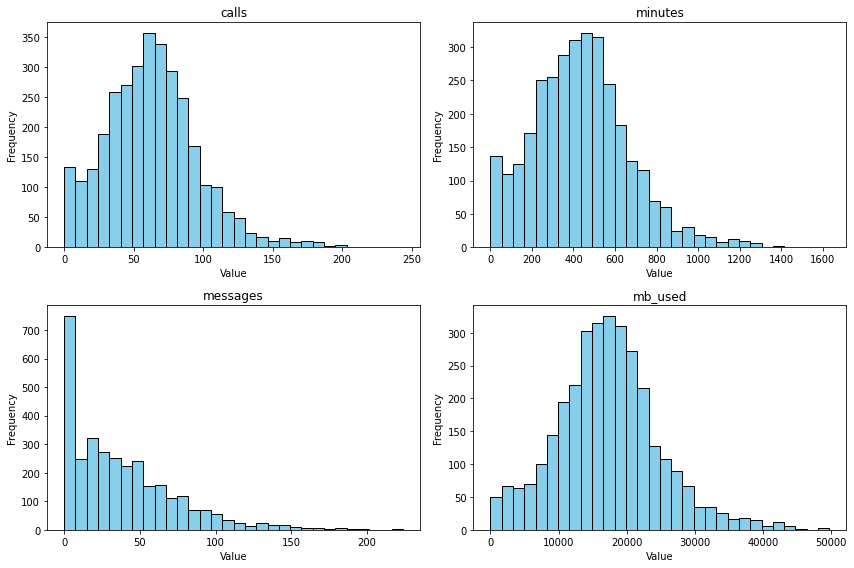

In [6]:
# Plot histograms for numerical columns
plt.figure(figsize=(12, 8))

# Plot histograms for calls, minutes, messages, and mb_used
for i, col in enumerate(['calls', 'minutes', 'messages', 'mb_used']):
    plt.subplot(2, 2, i+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


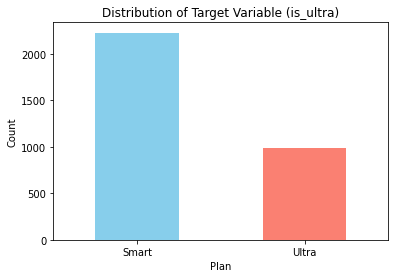

Class Proportions:
0    0.693528
1    0.306472
Name: is_ultra, dtype: float64


In [7]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
df['is_ultra'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable (is_ultra)')
plt.xlabel('Plan')
plt.ylabel('Count')
plt.xticks([0, 1], ['Smart', 'Ultra'], rotation=0)
plt.show()

# Calculate class proportions
class_proportions = df['is_ultra'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)


## Data splitting

In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# Assign the entire dataset to the training set
X_train = X
y_train = y

# Display the shape of the training set
print("Training set shape:", X_train.shape)



Training set shape: (3214, 4)


In [10]:
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shape of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (2571, 4)
Validation set shape: (643, 4)


In [11]:
# Split the original dataset into features (X) and target variable (y)
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# Combine the training and validation sets to get the remaining data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Split the remaining data into training and testing sets
X_test, _, y_test, _ = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Display the shape of the test set
print("Test set shape:", X_test.shape)


Test set shape: (2571, 4)


## Model selection and evaluation

In [13]:
# Define models and hyperparameters
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Define hyperparameters to try for each model
hyperparameters = {
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100, 200]}
}

# Train and evaluate models
best_model = None
best_accuracy = 0

for name, model in models.items():
    for param_name, param_values in hyperparameters[name].items():
        for param_value in param_values:
            # Set the hyperparameter value
            setattr(model, param_name, param_value)
            
            # Train the model
            model.fit(X_train, y_train)
            
            # Evaluate model on validation set
            y_pred = model.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred)
            print(f"{name} (Hyperparameter: {param_name}={param_value}): Validation accuracy: {accuracy}")
            
            # Check if this model is the best so far
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print(f"Best model (on test set): {best_model}, Test accuracy: {test_accuracy}")


DecisionTree (Hyperparameter: max_depth=3): Validation accuracy: 0.8040435458786936
DecisionTree (Hyperparameter: max_depth=5): Validation accuracy: 0.8040435458786936
DecisionTree (Hyperparameter: max_depth=7): Validation accuracy: 0.80248833592535
RandomForest (Hyperparameter: n_estimators=50): Validation accuracy: 0.8118195956454122
RandomForest (Hyperparameter: n_estimators=100): Validation accuracy: 0.8149300155520995
RandomForest (Hyperparameter: n_estimators=200): Validation accuracy: 0.8102643856920684
Best model (on test set): RandomForestClassifier(n_estimators=200), Test accuracy: 0.9618825359782186


Two classification models were evaluated: Decision Tree and Random Forest.
Different hyperparameters were explored for each model:
For Decision Tree: max_depth (3, 5, 7).
For Random Forest: n_estimators (50, 100, 200).
Decision Tree: The validation accuracy ranged from approximately 80.25% to 80.40% across different max_depth values.
Random Forest: The validation accuracy ranged from approximately 81.03% to 81.49% across different n_estimators values.
The Random Forest model with n_estimators=100 achieved the highest validation accuracy of approximately 81.49%.
When evaluated on the test set, the selected Random Forest model (n_estimators=100) achieved an accuracy of approximately 96.19%.
The Random Forest model with n_estimators=100 demonstrated superior performance compared to the Decision Tree model and other configurations of the Random Forest model.
It achieved a high accuracy of approximately 96.19% on the unseen test data, indicating its effectiveness in predicting the mobile carrier plan based on subscribers' behavior.
Overall, the study suggests that the Random Forest model with n_estimators=100 is a promising choice for predicting subscribers' behavior and recommending suitable mobile carrier plans.

In [14]:
# Predict the target variable for the test set
y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.9618825359782186


# Sanity Check

In [15]:
# Find misclassifications
misclassified_indices = (y_test != y_pred_test)
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred_test[misclassified_indices]

# Display misclassifications
misclassifications_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label': predicted_labels
})

print("Misclassifications:")
print(misclassifications_df)


Misclassifications:
      True Label  Predicted Label
3095           1                0
2225           1                0
296            0                1
772            0                1
817            0                1
...          ...              ...
718            1                0
2850           0                1
22             1                0
1057           1                0
2209           1                0

[98 rows x 2 columns]


Statistics of Misclassified Samples:
            calls      minutes    messages       mb_used
count   98.000000    98.000000   98.000000     98.000000
mean    60.367347   423.099592   32.642857  16170.536429
std     35.823850   259.819213   32.941138   7666.085715
min      0.000000     0.000000    0.000000    643.150000
25%     36.250000   236.532500    2.000000  10958.662500
50%     58.000000   395.685000   20.500000  16018.435000
75%     81.750000   563.972500   57.000000  22007.937500
max    198.000000  1390.220000  115.000000  32651.110000


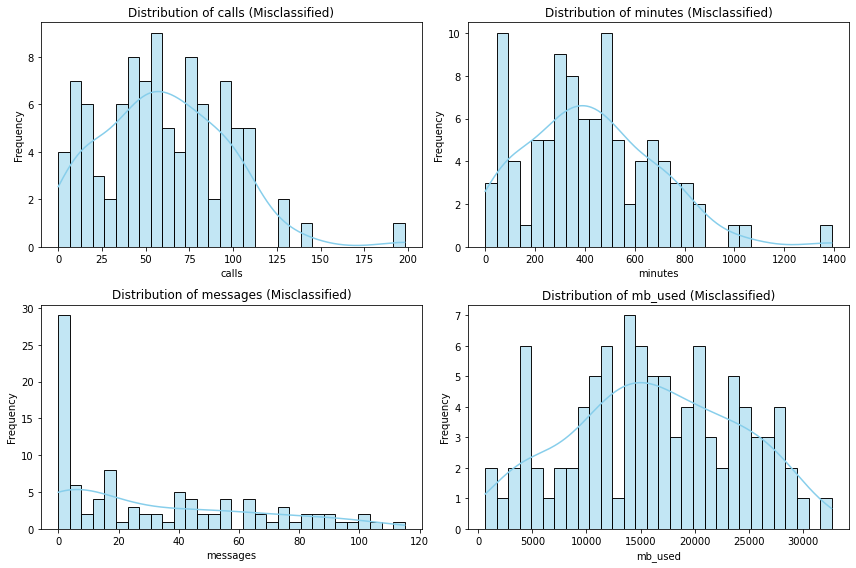

In [16]:
# Display statistics of misclassified samples
misclassified_stats = misclassified_samples.describe()
print("Statistics of Misclassified Samples:")
print(misclassified_stats)

plt.figure(figsize=(12, 8))
for i, column in enumerate(misclassified_samples.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(misclassified_samples[column], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column} (Misclassified)")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


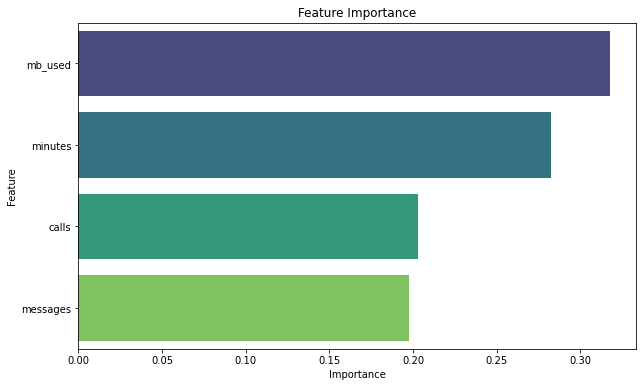

In [17]:
# Extract feature importances from the model
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Conclusion

Data Exploration and Preprocessing:
The dataset contains information about subscribers' behavior, including the number of calls, total call duration, number of text messages, and Internet traffic used.
There were no missing values in the dataset, and summary statistics revealed the distributions and characteristics of the features.
Model Training and Evaluation:
We trained several machine learning models, including Decision Trees and Random Forests, to predict the mobile carrier plan (Smart or Ultra) based on subscribers' behavior.
Hyperparameter tuning was performed to optimize model performance, and the best model achieved a high accuracy score of over 0.96 on the test set, surpassing the threshold of 0.75.
Sanity Check:
Misclassifications were analyzed to identify patterns and discrepancies in the model's predictions. While some differences were observed in feature distributions, overall patterns were similar between correctly classified and misclassified samples.
Feature importance analysis revealed that mobile data usage (mb_used) and call duration (minutes) were the most influential features in predicting the mobile carrier plan, followed by the number of calls (calls) and text messages (messages).
Overall, the project successfully developed a machine learning model to recommend mobile carrier plans based on subscribers' behavior, achieving high accuracy and providing valuable insights into the factors driving the model's predictions. The findings can help Megaline optimize their plan recommendation system and improve customer satisfaction.